<h1>Normalisation for the removal of batch effect</h1>

In [2]:
import sys
if '/home/rossco/immunova' not in sys.path:
    sys.path.append('/home/rossco/immunova')
from immunova.data.mongo_setup import pd_init
from immunova.data.fcs_experiments import FCSExperiment
from immunova.flow.gating.actions import Gating, Template
from immunova.flow.normalisation.normalise import Normalise, EvaluateBatchEffects, CalibrationError
from immunova.flow.supervised_algo.utilities import calculate_ref_sample_fast, find_common_features
from warnings import filterwarnings
from tqdm import tqdm_notebook
import matplotlib
import pandas as pd
import os
filterwarnings('ignore')
pd_init()

In [3]:
texp = FCSExperiment.objects(experiment_id='PD_T_PDMCs').get()

<h2>Calculate Reference Sample</h2>

In [4]:
invalid = [f'{x}_pdmc_t' for x in ['209-03', '210-14', '273-01', '298-01', '322-01', '237-06', '302-01']]
samples = [x for x in texp.list_samples() if x not in invalid]

In [5]:
reference_sample = calculate_ref_sample_fast(texp, exclude_samples=invalid, sample_n=1000)

In [6]:
reference_sample

'288-02_pdmc_t'

In [5]:
reference_sample = '288-02_pdmc_t'

<h2>How bad is the batch effect problem?</h2>

In [5]:
batch_effects = EvaluateBatchEffects(experiment=texp, transform='logicle')

Population single_Live_CD3+ not recognised
307-01_pdmc_t does not contain the population single_Live_CD3+, skipping


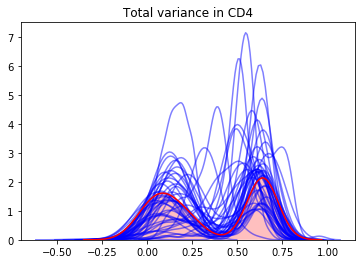

In [6]:
batch_effects.marker_variance(reference_id='288-02_pdmc_t', 
                              root_population='single_Live_CD3+',
                             marker='CD4')

Population single_Live_CD3+ not recognised
307-01_pdmc_t does not contain the population single_Live_CD3+, skipping


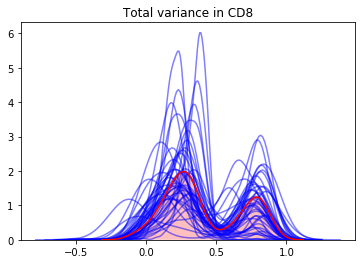

In [7]:
batch_effects.marker_variance(reference_id='288-02_pdmc_t', 
                              root_population='single_Live_CD3+',
                             marker='CD8')

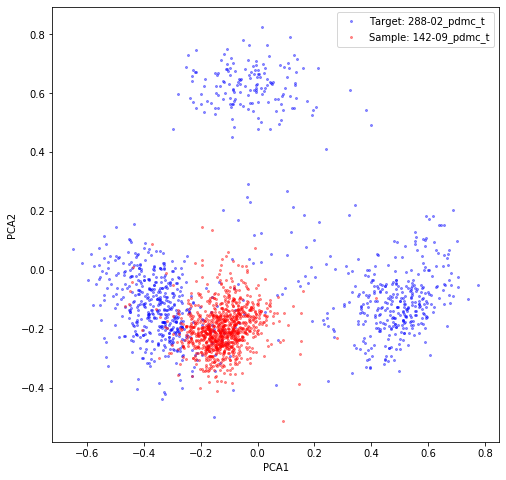

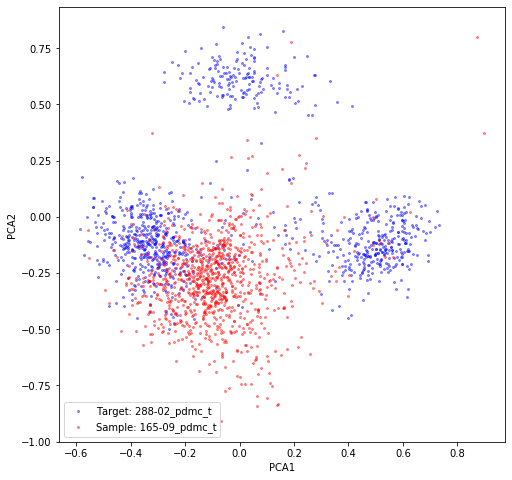

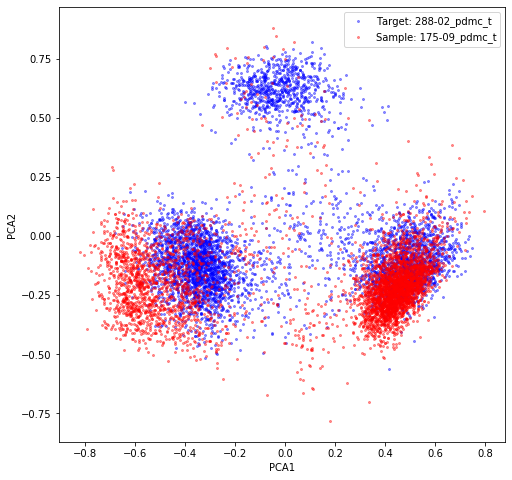

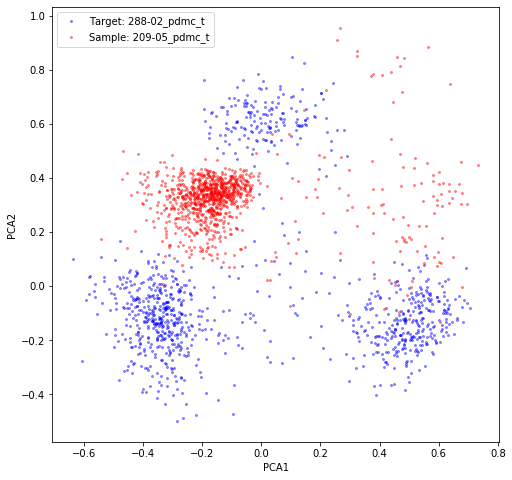

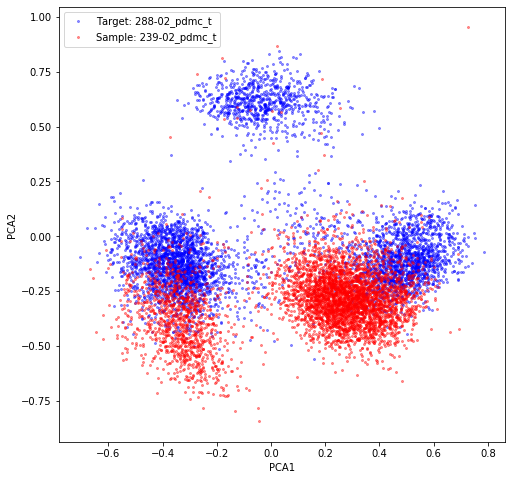

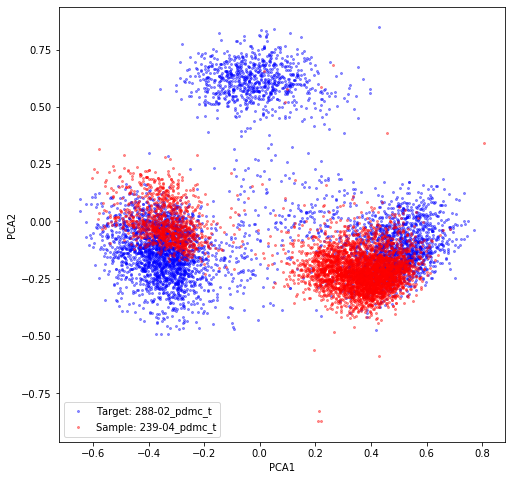

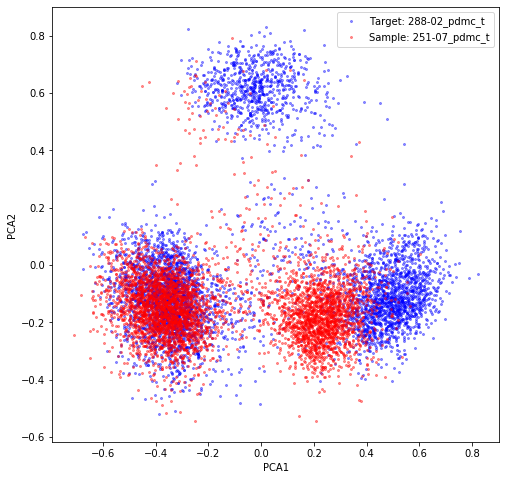

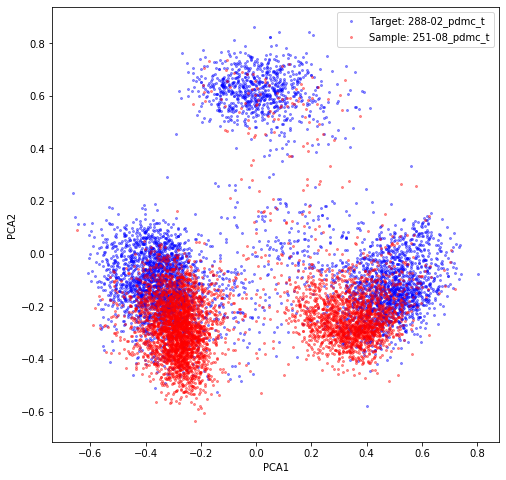

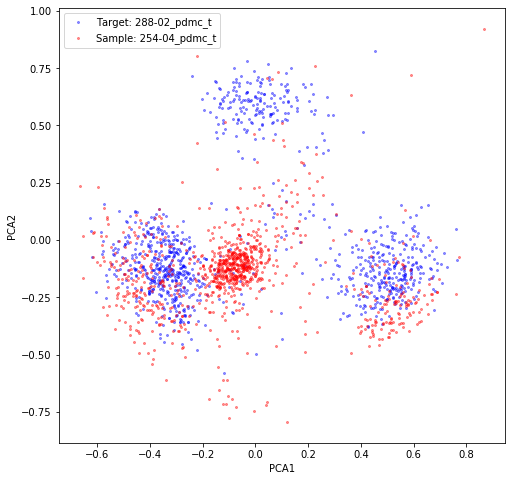

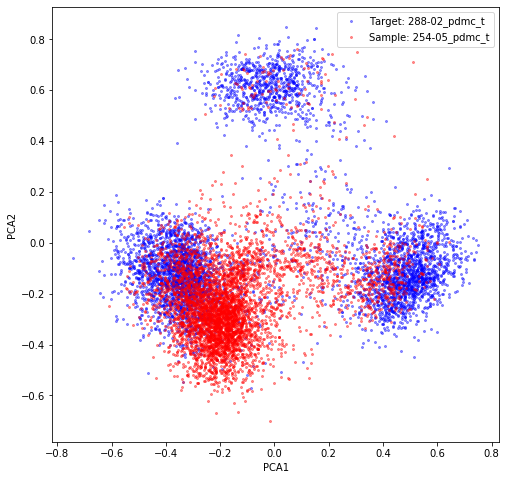

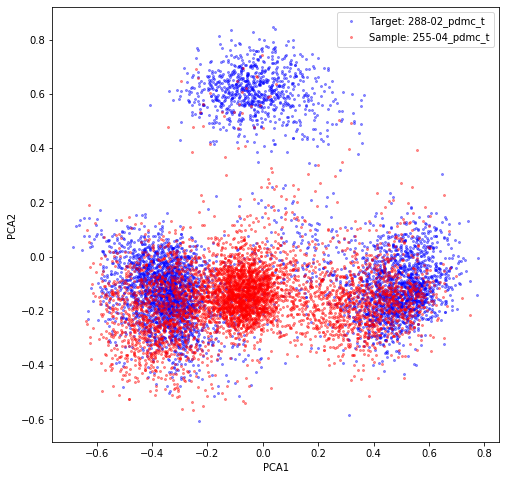

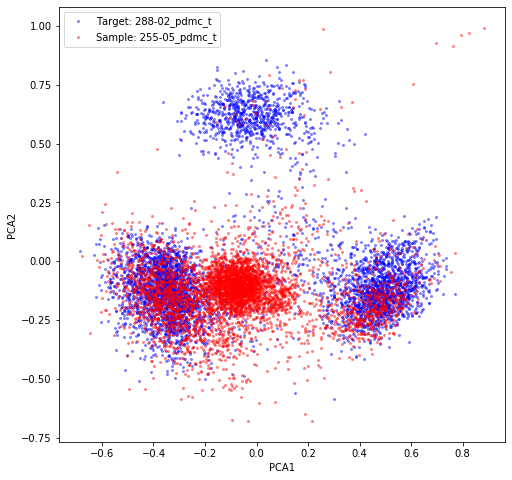

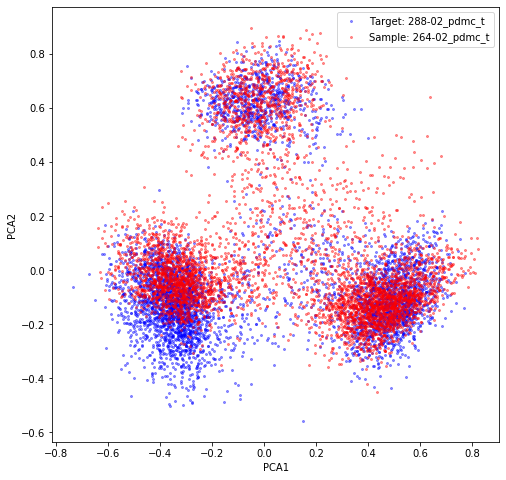

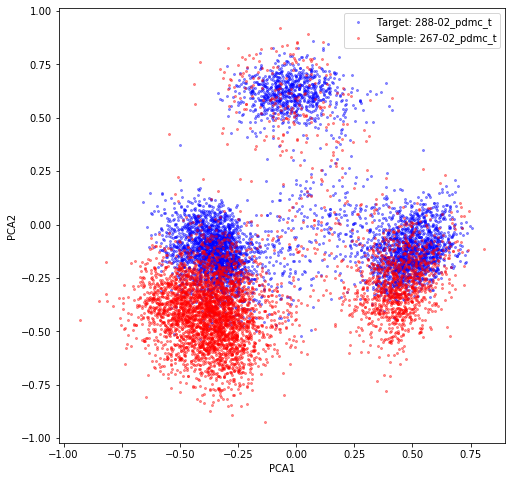

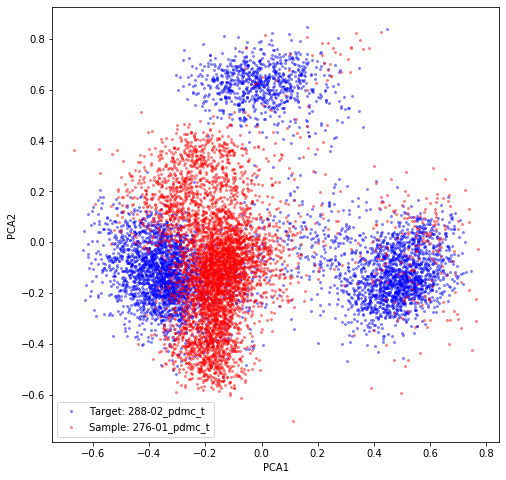

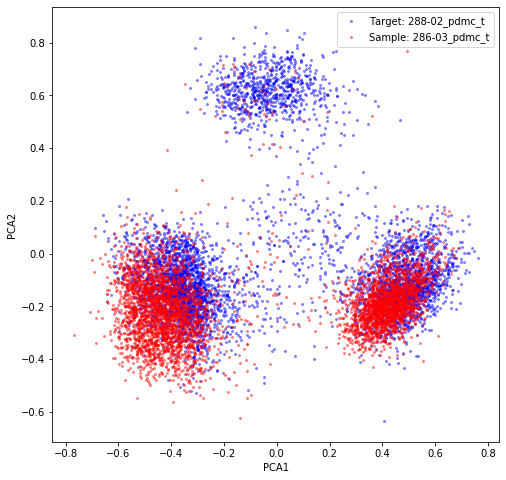

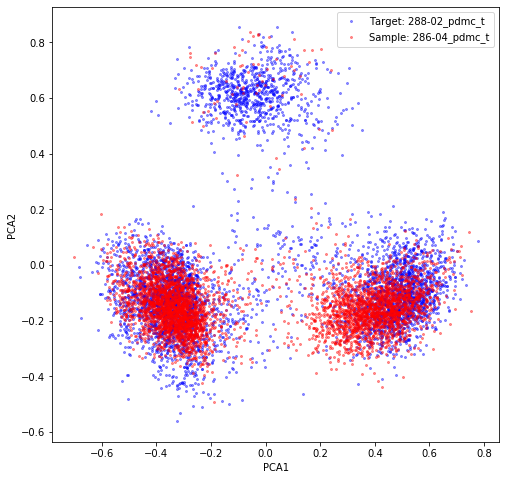

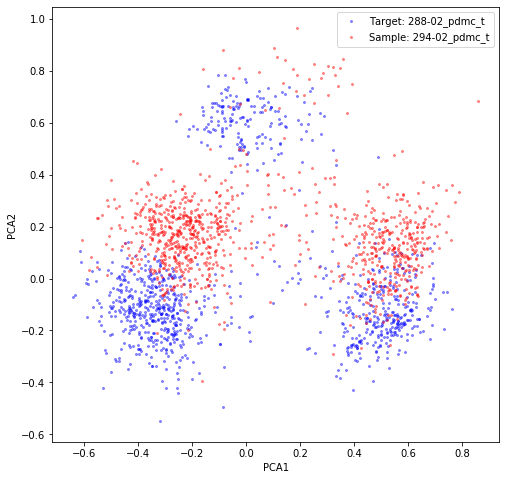

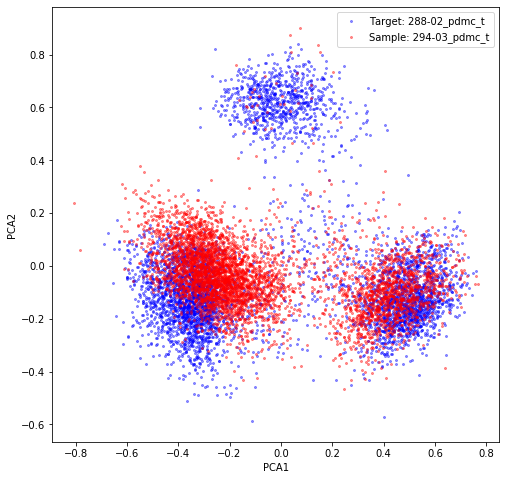

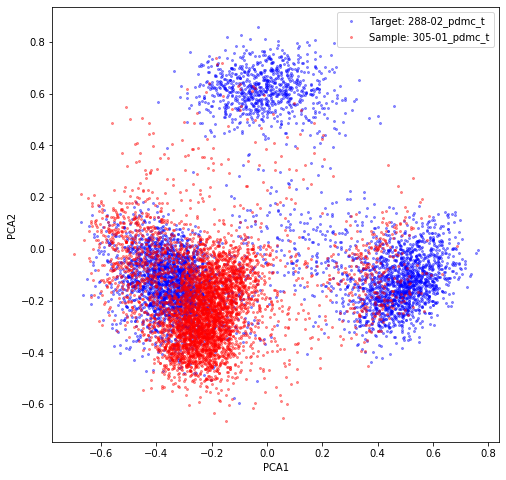

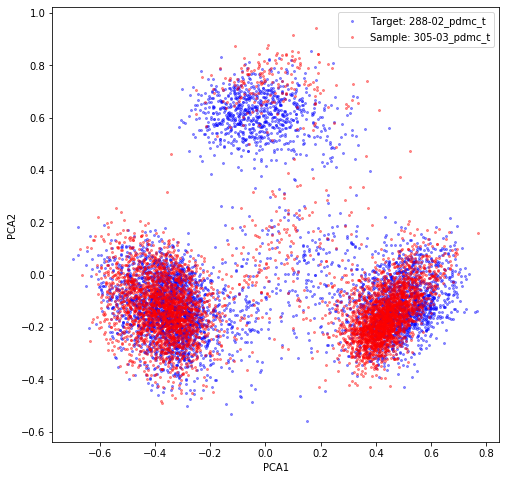

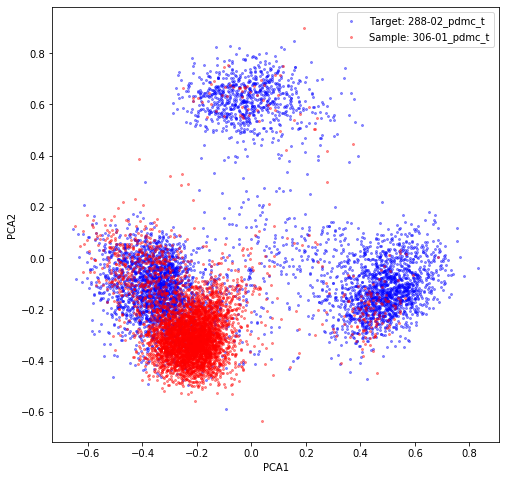

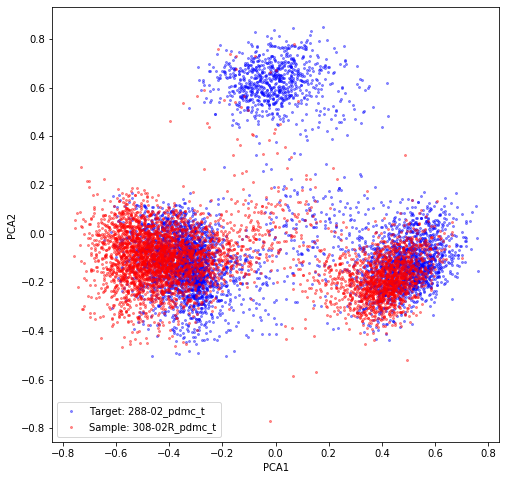

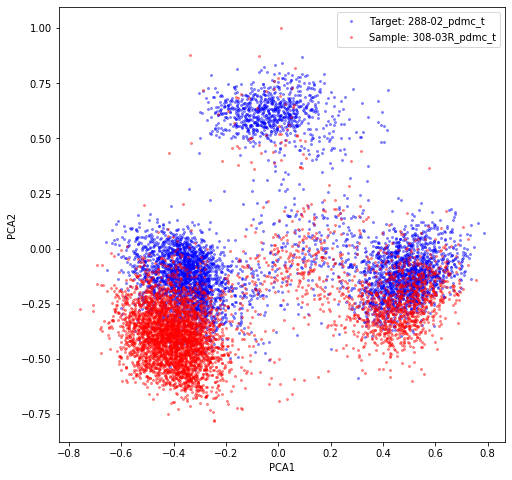

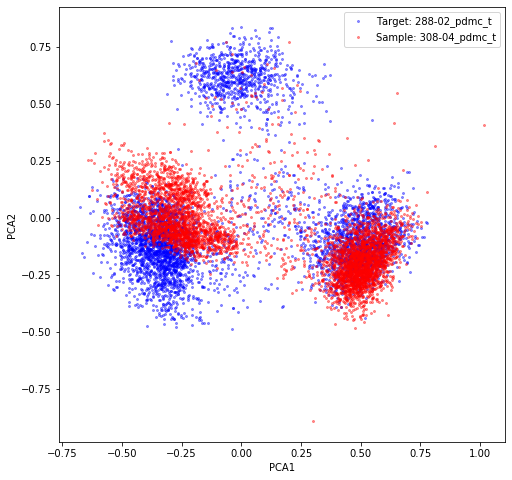

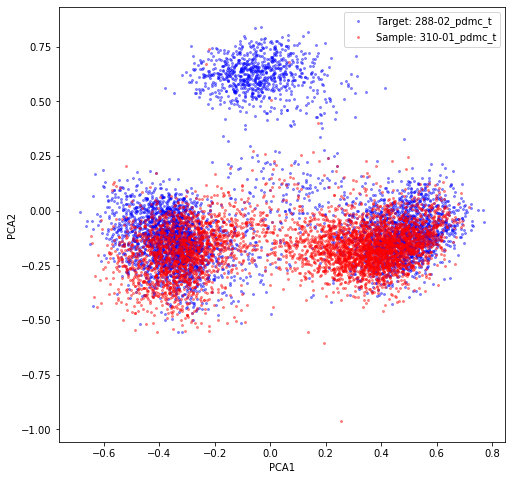

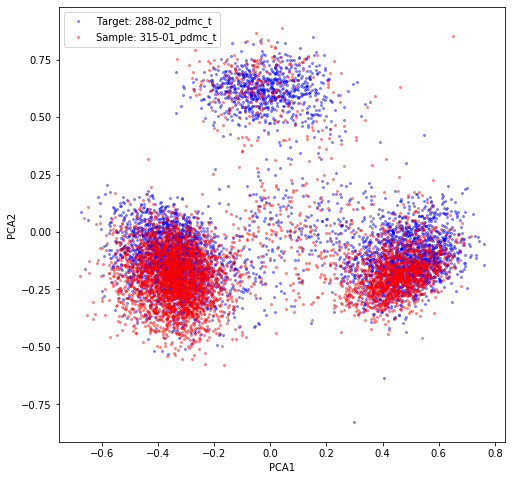

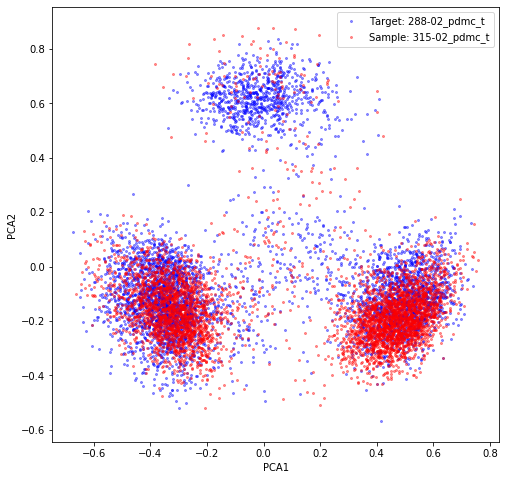

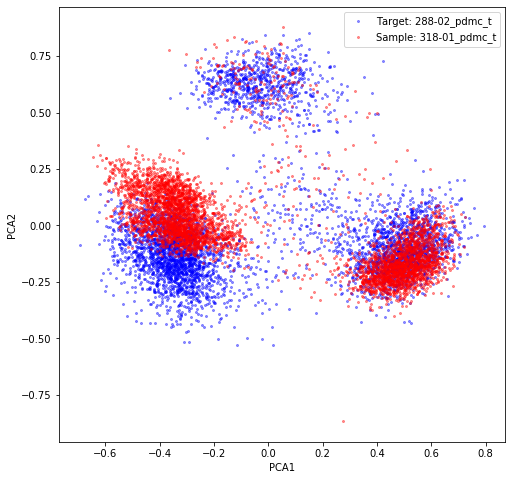

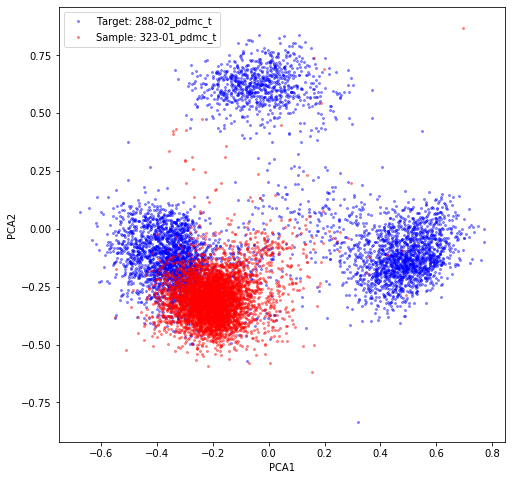

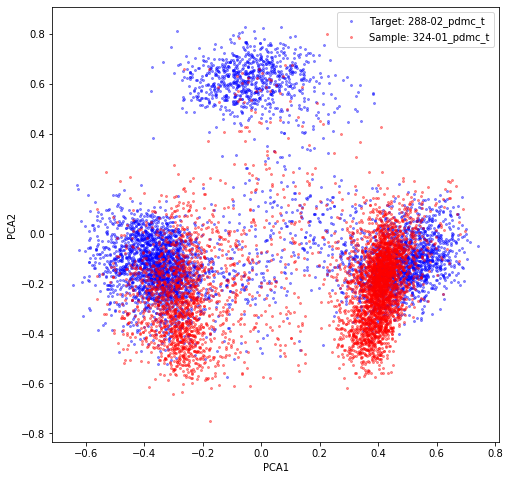

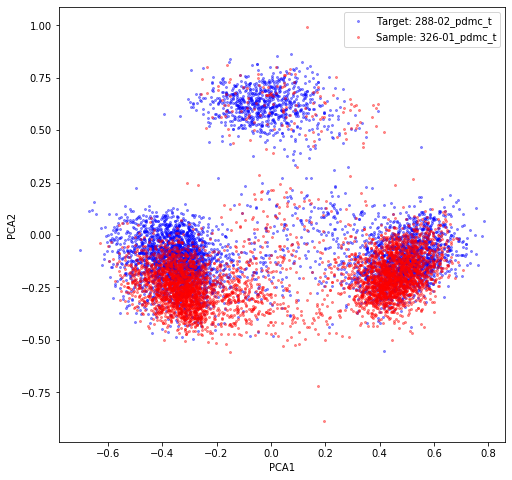

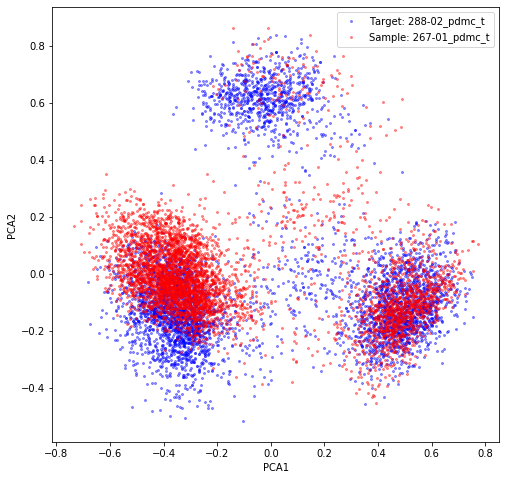

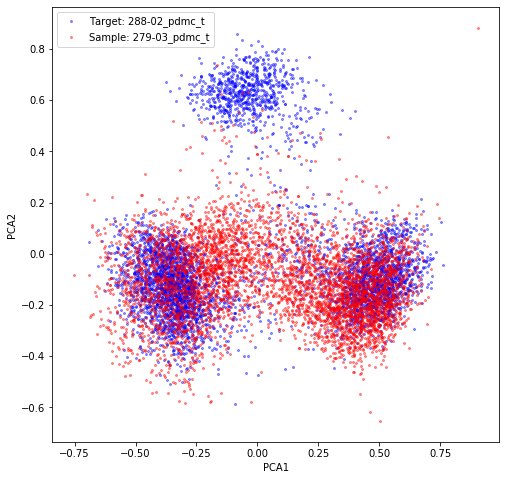

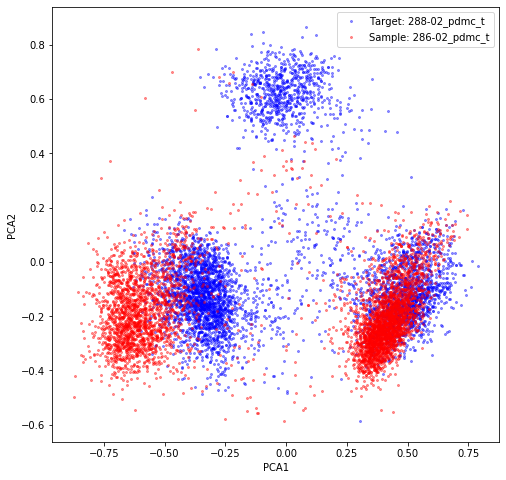

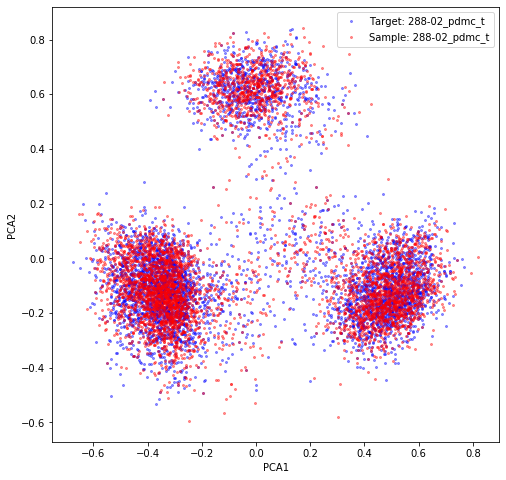

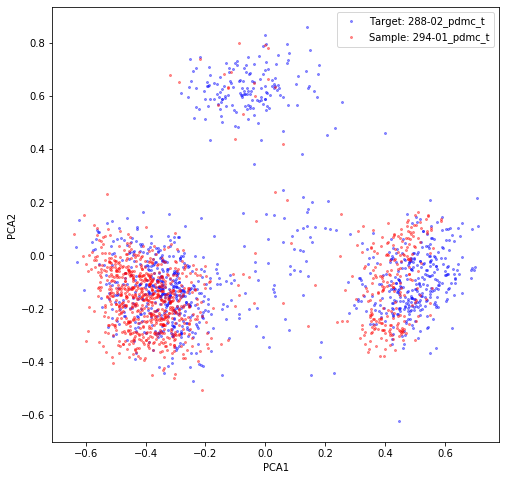

Population single_Live_CD3+ not recognised
Failed: skipping 307-01_pdmc_t


In [12]:
for x in samples:
    try:
        batch_effects.pca(sample_id=x, 
                          reference_id='288-02_pdmc_t',
                          root_population='single_Live_CD3+',
                          sample_n=5000)
    except ValueError:
        batch_effects.pca(sample_id=x,
                          reference_id='288-02_pdmc_t',
                          root_population='single_Live_CD3+',
                          sample_n=1000)
    except CalibrationError:
        print(f'Failed: skipping {x}')

<h2>Normalise the first sample</h2>

In [ ]:
features = find_common_features(experiment=texp)

In [6]:
features = ['CD45RA',
 'Va7.2',
 'FSC-A',
 'FSC-H',
 'SSC-A',
 'CD161',
 'CD8',
 'CXCR3',
 'Vd2',
 'CD4',
 'CD3',
 'CD27',
 'PanGD',
 'L/D',
 'CCR7',
 'SSC-W']

In [7]:
norm = Normalise(experiment=texp,
                source_id='318-01_pdmc_t',
                root_population='single_Live_CD3+',
                features=features,
                reference_sample=reference_sample,
                transform='logicle')

In [8]:
%matplotlib qt
norm.calibrate(evaluate=True)

setting scales using KNN
Scales: [1.463814207209771, 2.927628414419542, 5.855256828839084]
setting all scale weights to 1

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 52127 samples, validate on 5792 samples
Epoch 1/500
52127/52127 [==============================] - 16s 311us/step - loss: 0.5716 - val_loss: 0.9606
Epoch 2/500
52127/52127 [==============================] - 15s 281us/step - loss: 0.2420 - val_loss: 0.9004
Epoch 3/500
52127/52127 [==============================] - 15s 280us/step - loss: 0.2000 - val_loss: 0.8597
Epoch 4/500
52127/52127 [==============================] - 15s 280us/step - loss: 0.1894 - val_loss: 0.8148
Epoch 5/500
52127/52127 [==============================] - 15s 284us/step - loss: 0.1837 - val_loss: 0.7622
Epoch 6/500
52127/52127 [==============================] - 15s 283us/step - loss: 0.1787 - val_loss: 0.6811
Epoch 7/500
52127/52127 [==============================] - 15s 280us/step - loss: 0.1

Epoch 67/500
52127/52127 [==============================] - 14s 277us/step - loss: 0.1457 - val_loss: 0.1985
Epoch 68/500
52127/52127 [==============================] - 14s 277us/step - loss: 0.1454 - val_loss: 0.2095
Epoch 69/500
52127/52127 [==============================] - 15s 280us/step - loss: 0.1444 - val_loss: 0.1813
Epoch 70/500
52127/52127 [==============================] - 15s 282us/step - loss: 0.1440 - val_loss: 0.2292
Epoch 71/500
52127/52127 [==============================] - 14s 277us/step - loss: 0.1442 - val_loss: 0.1777
Epoch 72/500
52127/52127 [==============================] - 14s 274us/step - loss: 0.1433 - val_loss: 0.1786
Epoch 73/500
52127/52127 [==============================] - 14s 272us/step - loss: 0.1427 - val_loss: 0.1917
Epoch 74/500
52127/52127 [==============================] - 14s 271us/step - loss: 0.1440 - val_loss: 0.2122
Epoch 75/500
52127/52127 [==============================] - 14s 270us/step - loss: 0.1443 - val_loss: 0.1889
Epoch 76/500
52127/

Epoch 142/500
52127/52127 [==============================] - 14s 273us/step - loss: 0.1390 - val_loss: 0.1801
Epoch 143/500
52127/52127 [==============================] - 14s 274us/step - loss: 0.1397 - val_loss: 0.1940
Epoch 144/500
52127/52127 [==============================] - 15s 281us/step - loss: 0.1398 - val_loss: 0.2260
Epoch 145/500
52127/52127 [==============================] - 15s 279us/step - loss: 0.1379 - val_loss: 0.2445
Epoch 146/500
52127/52127 [==============================] - 15s 283us/step - loss: 0.1395 - val_loss: 0.1979
Epoch 147/500
52127/52127 [==============================] - 14s 275us/step - loss: 0.1393 - val_loss: 0.2271
Epoch 148/500
52127/52127 [==============================] - 14s 274us/step - loss: 0.1397 - val_loss: 0.1877
Epoch 149/500
52127/52127 [==============================] - 14s 275us/step - loss: 0.1393 - val_loss: 0.1931
Epoch 150/500
52127/52127 [==============================] - 14s 275us/step - loss: 0.1319 - val_loss: 0.1768
Epoch 151/

52127/52127 [==============================] - 14s 276us/step - loss: 0.1286 - val_loss: 0.1719
Epoch 217/500
52127/52127 [==============================] - 14s 275us/step - loss: 0.1278 - val_loss: 0.1694
Epoch 218/500
52127/52127 [==============================] - 14s 277us/step - loss: 0.1293 - val_loss: 0.1738
Epoch 219/500
52127/52127 [==============================] - 14s 277us/step - loss: 0.1282 - val_loss: 0.1745
Epoch 220/500
52127/52127 [==============================] - 14s 276us/step - loss: 0.1280 - val_loss: 0.1674
Epoch 221/500
52127/52127 [==============================] - 15s 282us/step - loss: 0.1283 - val_loss: 0.1703
Epoch 222/500
52127/52127 [==============================] - 14s 275us/step - loss: 0.1278 - val_loss: 0.1785
Epoch 223/500
52127/52127 [==============================] - 14s 276us/step - loss: 0.1282 - val_loss: 0.1717
Epoch 224/500
52127/52127 [==============================] - 14s 276us/step - loss: 0.1281 - val_loss: 0.1750
Epoch 225/500
52127/5212

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices